In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df = pd.read_csv('shoe.csv')

In [3]:
df.shape

(40, 2)

In [4]:
df.isnull().sum()

size(cm)    0
class(y)    0
dtype: int64

In [5]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


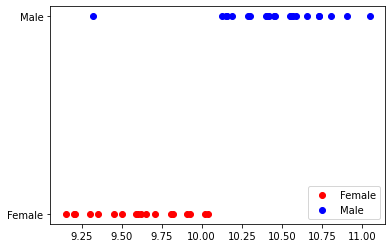

In [6]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'], color='red', label='Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color='blue', label='Male')

plt.legend()

# Preprocessing

In [7]:
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [8]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


## Split Data for Training and Testing

In [9]:
xtrain,xtest,ytrain,ytest = tts(df[['size(cm)']], df['class(y)'], test_size=.30, random_state=23)

# LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lreg= LogisticRegression()

### Training

In [12]:
lreg.fit(xtrain,ytrain)

LogisticRegression()

In [13]:
lreg.coef_

array([[2.18010493]])

In [14]:
lreg.intercept_

array([-21.57887122])

### Testing

In [15]:
lreg_pred=lreg.predict(xtest)
lreg_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [16]:
lreg.decision_function(xtest)

array([ 0.87620952,  1.66104729, -0.41005239, -1.5219059 , -0.67166498,
        1.09422001, -0.17024084, -0.19204189,  1.42123575,  0.30938224,
        1.20322526,  0.54919378])

In [17]:
lreg_mse=mean_squared_error(ytest,lreg_pred)
lreg_mae=mean_absolute_error(ytest,lreg_pred)
lreg_r2=r2_score(ytest,lreg_pred)
print("LogisticRegression mean_squared_error \"MSE:\"",lreg_mse)
print("LogisticRegression mean_absolute_error \"MAE:\"",lreg_mae)
print("LogisticRegression r2_score:",lreg_r2)

LogisticRegression mean_squared_error "MSE:" 0.08333333333333333
LogisticRegression mean_absolute_error "MAE:" 0.08333333333333333
LogisticRegression r2_score: 0.6666666666666667


In [18]:
logistic_score=lreg.score(xtest,ytest)
logistic_score

0.9166666666666666

# KNeighborsRegressor

In [93]:
from sklearn.neighbors import KNeighborsRegressor

In [106]:
KNN=KNeighborsRegressor(n_neighbors=5)

In [107]:
KNN.fit(xtrain,ytrain)

KNeighborsRegressor()

In [108]:
knn_pred=KNN.predict(xtest)
knn_pred

array([1. , 1. , 0. , 0.2, 0. , 1. , 0. , 0. , 1. , 0.4, 1. , 0.8])

In [109]:
knn_mse=mean_squared_error(ytest,knn_pred)
knn_mae=mean_absolute_error(ytest,knn_pred)
knn_r2=r2_score(ytest,knn_pred)
print("KNN mean_squared_error \"MSE:\"",knn_mse)
print("KNN mean_absolute_error \"MAE:\"",knn_mae)
print("KNN r2_score:",knn_r2)

KNN mean_squared_error "MSE:" 0.02
KNN mean_absolute_error "MAE:" 0.06666666666666667
KNN r2_score: 0.92


In [110]:
KNN_score=KNN.score(xtest,ytest)
KNN_score

0.92

In [111]:
data = {'Name': ['KNN mean_squared_error','LogisticRegression mean_squared_error',
              'KNN mean_absolute_error','LogisticRegression mean_absolute_error',
              'KNN r2_score','LogisticRegression r2_score','KNN_score','logistic_score'],
     'Accuracy': [knn_mse,lreg_mse, knn_mae,lreg_mae,knn_r2,lreg_r2,KNN_score,logistic_score]}
df_after_pred = pd.DataFrame(data=data)

In [112]:
df_after_pred

,Name,Accuracy
0,KNN mean_squared_error,0.020000
1,LogisticRegression mean_squared_error,0.083333
2,KNN mean_absolute_error,0.066667
3,LogisticRegression mean_absolute_error,0.083333
4,KNN r2_score,0.920000
5,LogisticRegression r2_score,0.666667
6,KNN_score,0.920000
7,logistic_score,0.916667


<AxesSubplot:xlabel='Accuracy', ylabel='Name'>

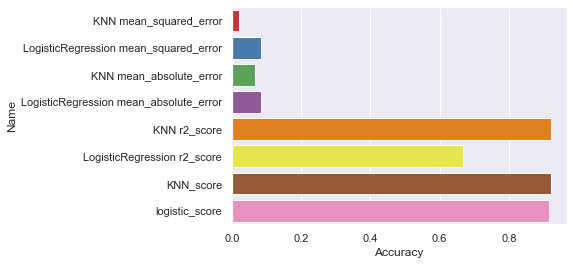

In [113]:
sns.barplot(y='Name',x='Accuracy',data=df_after_pred,palette='Set1')